In [1]:
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, f1_score

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train_full = x_train_full.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train_full = y_train_full.flatten()
y_test = y_test.flatten()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

### Variasi 1

<p>
Spesifikasi:<br/>
2 layer konvolusi: filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [3]:
model_1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_1 = model_1.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

C:\Users\Nicholas R. Sihite\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3458 - loss: 1.8021 - val_accuracy: 0.5124 - val_loss: 1.3682
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5347 - loss: 1.3106 - val_accuracy: 0.5842 - val_loss: 1.1979
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.5967 - loss: 1.1528 - val_accuracy: 0.5986 - val_loss: 1.1602
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.6362 - loss: 1.0550 - val_accuracy: 0.6253 - val_loss: 1.0894
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6547 - loss: 0.9960 - val_accuracy: 0.6437 - val_loss: 1.0421
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6709 - loss: 0.9475 - val_accuracy: 0.6534 - val_loss: 1.0190
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.6895 - loss: 0.8941 - val_accuracy: 0.6560 - val_loss: 1.0099
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.6989 - loss: 0.8559 - val_accu

### Variasi 2

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 64 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [4]:
model_2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_2 = model_2.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 21s 28ms/step - accuracy: 0.3337 - loss: 1.8326 - val_accuracy: 0.5078 - val_loss: 1.3683
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.5449 - loss: 1.2831 - val_accuracy: 0.5978 - val_loss: 1.1565
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6133 - loss: 1.1162 - val_accuracy: 0.6304 - val_loss: 1.0824
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6481 - loss: 1.0124 - val_accuracy: 0.6430 - val_loss: 1.0345
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.6792 - loss: 0.9269 - val_accuracy: 0.6553 - val_loss: 1.0086
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.6979 - loss: 0.8759 - val_accuracy: 0.6545 - val_loss: 1.0128
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.7103 - loss: 0.8320 - val_accuracy: 0.6792 - val_loss: 0.9418
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.7325 - loss: 0.7702 - val_a

### Variasi 3

<p>
Spesifikasi:<br/>
2 layer konvolusi:<br/>
- filter 32 dengan ukuran 3 x 3 dan aktivasi relu<br/>
- filter 128 dengan ukuran 3 x 3 dan aktivasi relu<br/>
2 layer max pooling dengan ukuran 2 x 2<br/>
1 flatten<br/>
2 layer dense:<br/>
- 1 dengan 64 neuron dan aktivasi relu<br/>
- 1 dengan 10 neuron dan aktivasi softmax
</p>

In [5]:
model_3 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

model_3.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history_3 = model_3.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.3491 - loss: 1.7928 - val_accuracy: 0.5131 - val_loss: 1.3732
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.5620 - loss: 1.2470 - val_accuracy: 0.6153 - val_loss: 1.1106
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6292 - loss: 1.0695 - val_accuracy: 0.6410 - val_loss: 1.0436
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.6591 - loss: 0.9740 - val_accuracy: 0.6501 - val_loss: 1.0146
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.6904 - loss: 0.8929 - val_accuracy: 0.6690 - val_loss: 0.9628
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.7159 - loss: 0.8285 - val_accuracy: 0.6703 - val_loss: 0.9616
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.7325 - loss: 0.7742 - val_accuracy: 0.6895 - val_loss: 0.9154
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.7513 - loss: 0.7233 - 

In [6]:
def evaluate_model(model, x_test, y_test, history):
    y_pred = model.predict(x_test)
    y_pred_classes = y_pred.argmax(axis=1)
    
    f1 = f1_score(y_test, y_pred_classes, average='macro')
    print(classification_report(y_test, y_pred_classes))
    print(f"Macro F1-score: {f1:.4f}")

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    return f1

### Evaluasi Model 1

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      1000
           1       0.78      0.75      0.77      1000
           2       0.55      0.55      0.55      1000
           3       0.50      0.47      0.48      1000
           4       0.62      0.59      0.61      1000
           5       0.58      0.58      0.58      1000
           6       0.78      0.72      0.75      1000
           7       0.71      0.71      0.71      1000
           8       0.78      0.79      0.78      1000
           9       0.66      0.80      0.72      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000

Macro F1-score: 0.6662


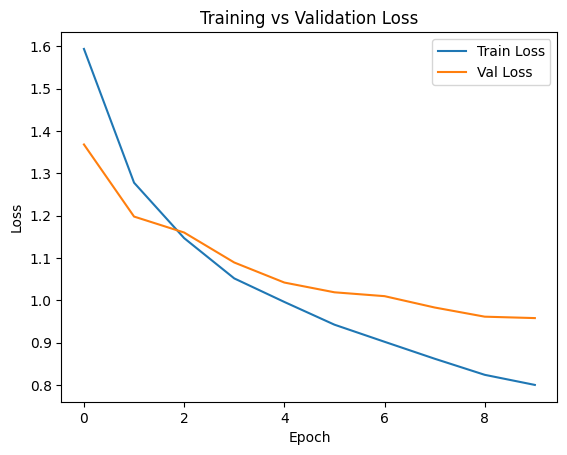

0.6662346603825599

In [7]:
evaluate_model(model_1, x_test, y_test, history_1)

### Evaluasi Model 2

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      1000
           1       0.74      0.82      0.78      1000
           2       0.58      0.60      0.59      1000
           3       0.55      0.44      0.49      1000
           4       0.63      0.62      0.62      1000
           5       0.64      0.54      0.59      1000
           6       0.82      0.70      0.75      1000
           7       0.68      0.77      0.72      1000
           8       0.72      0.85      0.78      1000
           9       0.71      0.79      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000

Macro F1-score: 0.6785


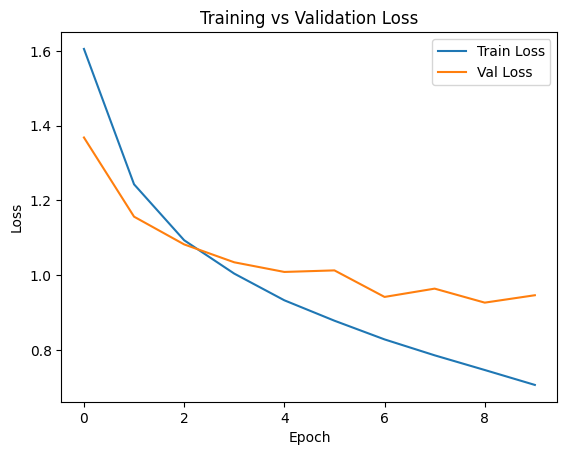

0.678506341780328

In [8]:
evaluate_model(model_2, x_test, y_test, history_2)

### Evaluasi Model 3

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
              precision    recall  f1-score   support

           0       0.68      0.74      0.71      1000
           1       0.79      0.84      0.81      1000
           2       0.64      0.57      0.60      1000
           3       0.52      0.54      0.53      1000
           4       0.69      0.62      0.65      1000
           5       0.72      0.47      0.57      1000
           6       0.70      0.82      0.76      1000
           7       0.72      0.75      0.74      1000
           8       0.74      0.83      0.78      1000
           9       0.73      0.77      0.75      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

Macro F1-score: 0.6905


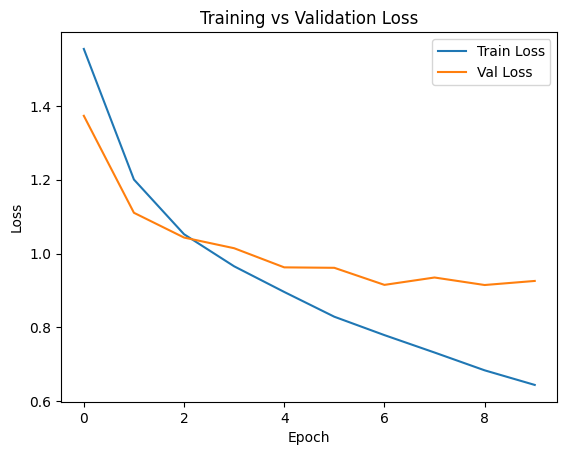

0.690546371521995

In [9]:
evaluate_model(model_3, x_test, y_test, history_3)